# EDA and Preprocessing

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from bs4 import BeautifulSoup

### Loading data 

In [8]:
# reading data from CSV files
train_csv=pd.read_csv('train.csv')
test_csv=pd.read_csv('test.csv')
submit_csv=pd.read_csv('submit.csv')

In [9]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
train_csv.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### unreliable news = 1
#### reliable news     = 0

In [12]:
# checking the shape of trian and test csv.
print('Train CSV shape :--', train_csv.shape)
print('Test CSV shape  :--', test_csv.shape)

Train CSV shape :-- (20800, 5)
Test CSV shape  :-- (5200, 4)


In [14]:
# checing for NaN values
train_csv.isna().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [29]:
# checking for duplicate values wtih respect to id
## we are not checking duplicate in author column becase a author can write multiple Articles
print('Duplicate entry Id column =',train_csv.duplicated(subset = 'id').any())
print('Duplicate entry title column =',train_csv.duplicated(subset = 'title').any())
print('Duplicate entry text column =',train_csv.duplicated(subset = 'text').any())


Duplicate entry Id column = False
Duplicate entry title column = True
Duplicate entry text column = True


### Observations
1. Train_csv has 5 columns and 20800 rows.
2. Test_csv has 4 columns and 5200 rows.
3. There are some Nan values present in our train data.
4. There are some duplicate values in tilte and text columns of the data.


In [13]:
# droping duplicated values and NaN values
# reomiving duplicate valeus from train data
train_csv.drop_duplicates(subset=['title','text'], inplace=True)
# droping duplicates from test data.
test_csv.drop_duplicates(subset=['title','text'], inplace=True)

# droping Nan Values form train and test data.
train_csv.dropna(axis=0,inplace=True)
test_csv.dropna(axis=0,inplace=True)
 
print('Train CSV shape :--', train_csv.shape)
print('Test CSV shape  :--', test_csv.shape)

Train CSV shape :-- (18240, 5)
Test CSV shape  :-- (4573, 4)


### Observations
1. There are total 2542 rows have duplicate values or NaN entry

### Distribution of Class lables

percentage of unreliable  articles  43.3361
percentage of reliable articles  56.6639


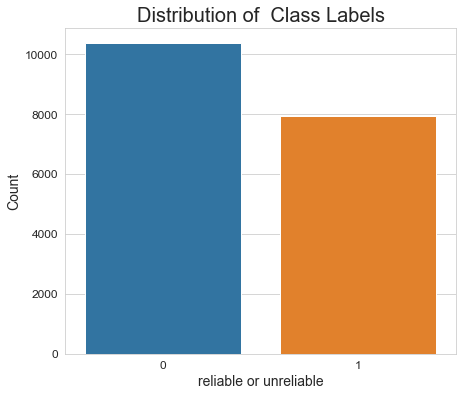

In [97]:
plt.figure(figsize=(7,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.countplot(data=train_csv,x='label') # conting unique values  
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12) 
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('reliable or unreliable', size = 14)
plt.ylabel('Count', size = 14)
count=train_csv['label'].value_counts()
no=np.round((count[0]/(count[0]+count[1]))*100,4)
yes=np.round((count[1]/(count[0]+count[1]))*100,4)
print('percentage of unreliable  articles ', yes)
print('percentage of reliable articles ', no)
plt.show()

### Observations
1. train dataset is allmost balanced dataset.
2. There is 43% of data which is unreliable to read.


In [17]:
# breaking thet trian data into reliable data and unreliable data for futher analysis.
#https://towardsdatascience.com/loc-vs-iloc-in-pandas-92fc125ed8eb#:~:text=loc%20vs%20iloc%20in%20Pandas%201%20Introduction.%20...,retrieve%20the%20requested%20rows.%204%20Final%20Thoughts.%20
reliable_data=train_csv.loc[train_csv['label']==int(0)]
unreliable_data=train_csv.loc[train_csv['label']==int(1)]

### Top 20 Author who wrote frequently unreliable news articles

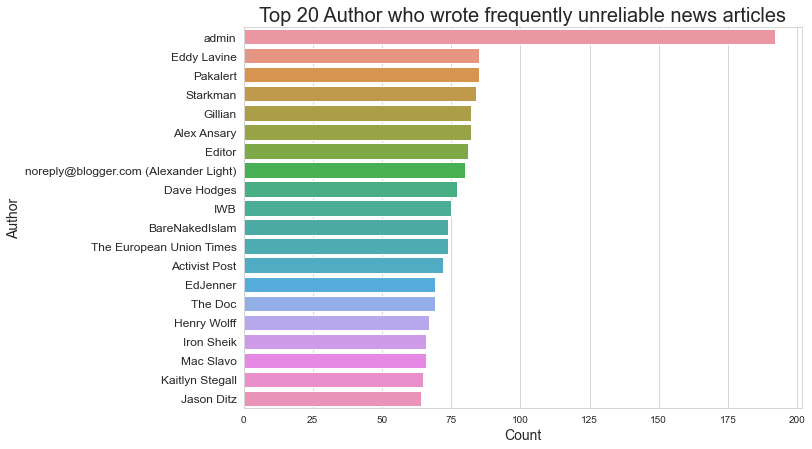

In [106]:
plt.figure(figsize=(10,7)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.countplot(data=unreliable_data,y='author',order=unreliable_data['author'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(size = 10) # size of x axis indicators(yes/no)
plt.yticks(size = 12) 
plt.title('Top 20 Author who wrote frequently unreliable news articles', fontsize=20)
plt.xlabel('Count', size = 14)
plt.ylabel('Author', size = 14)
plt.show()

#### Observations
1. admin named author had wrote maximum number of fake news articles i.e above 175.
2. other author wrote less then 100 fake news articles 

### Top 20 Author who wrote frequemntly reliable news articles

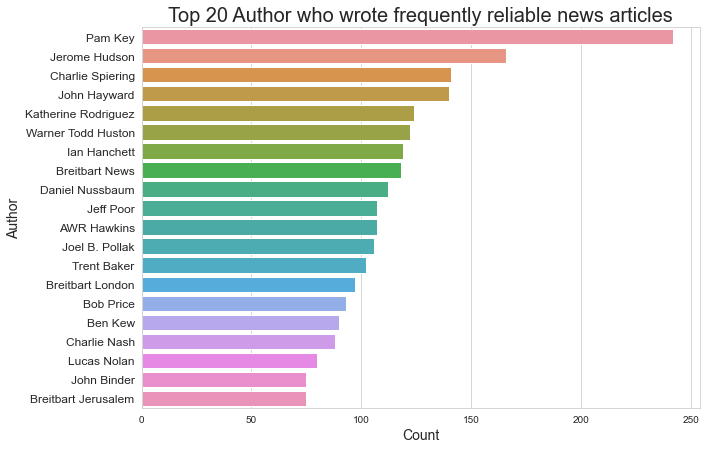

In [107]:
plt.figure(figsize=(10,7)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.countplot(data=reliable_data,y='author',order=reliable_data['author'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(size = 10) # size of x axis indicators(yes/no)
plt.yticks(size = 12) 
plt.title('Top 20 Author who wrote frequently reliable news articles', fontsize=20)
plt.xlabel('Count', size = 14)
plt.ylabel('Author', size = 14)
plt.show()

#### Observations
1. most trusted author is pam key who wrote maximum number of  reliable articles.
2. jerome hudsom worte above 150 reliable articles.

In [18]:
# changing data type of text and title to sting
train_csv['text']=train_csv['text'].astype(str)
train_csv['title']=train_csv['title'].astype(str)
reliable_data['title']=reliable_data['title'].astype(str)
unreliable_data['title']=unreliable_data['title'].astype(str)
reliable_data['text']=reliable_data['text'].astype(str)
unreliable_data['text']=unreliable_data['text'].astype(str)

<ipython-input-18-8363dccd251d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliable_data['title']=reliable_data['title'].astype(str)
<ipython-input-18-8363dccd251d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unreliable_data['title']=unreliable_data['title'].astype(str)
<ipython-input-18-8363dccd251d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [149]:
## calculating length of text in the article
train_csv['text_length']=train_csv['text'].apply(lambda x : len(x.split()))
train_csv['title_length']=train_csv['title'].apply(lambda x : len(x.split()))
reliable_data['title_length']=reliable_data['title'].apply(lambda x : len(x.split()))
unreliable_data['title_length']=unreliable_data['title'].apply(lambda x : len(x.split()))
reliable_data['text_length']=reliable_data['text'].apply(lambda x : len(x.split()))
unreliable_data['text_length']=unreliable_data['text'].apply(lambda x : len(x.split()))

<ipython-input-149-44ff99278063>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliable_data['title_length']=reliable_data['title'].apply(lambda x : len(x.split()))
<ipython-input-149-44ff99278063>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unreliable_data['title_length']=unreliable_data['title'].apply(lambda x : len(x.split()))
<ipython-input-149-44ff99278063>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

### Distribution of Test length

C:\Users\Nimble\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nimble\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

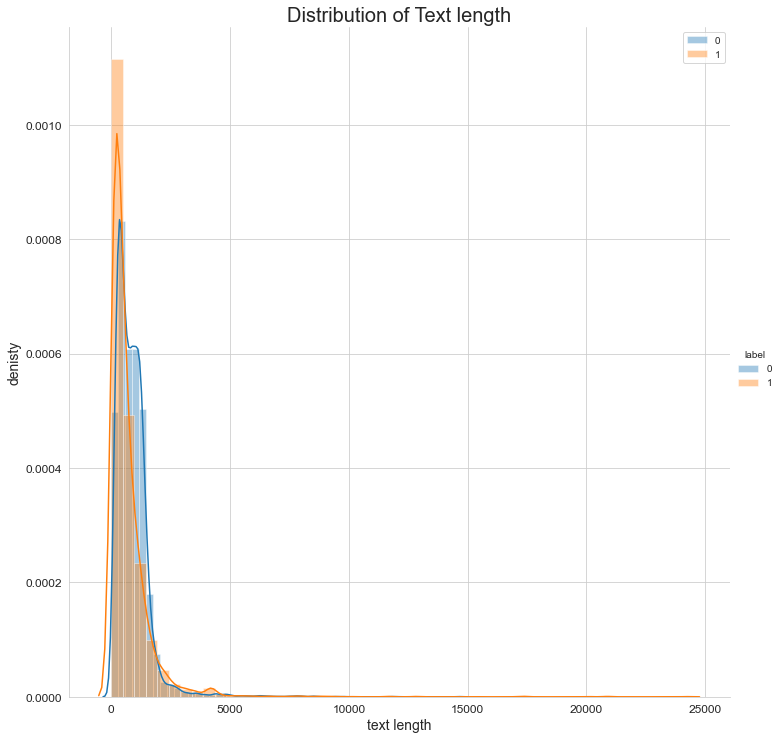

In [150]:
plt.figure(figsize=(10,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.FacetGrid(train_csv, hue="label",height=10) \
   .map(sns.distplot, "text_length").add_legend()# conting unique values  
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12) 
plt.title('Distribution of Text length', fontsize=20)
plt.xlabel('text length', size = 14)
plt.ylabel('denisty', size = 14)
plt.legend()
plt.show()

C:\Users\Nimble\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


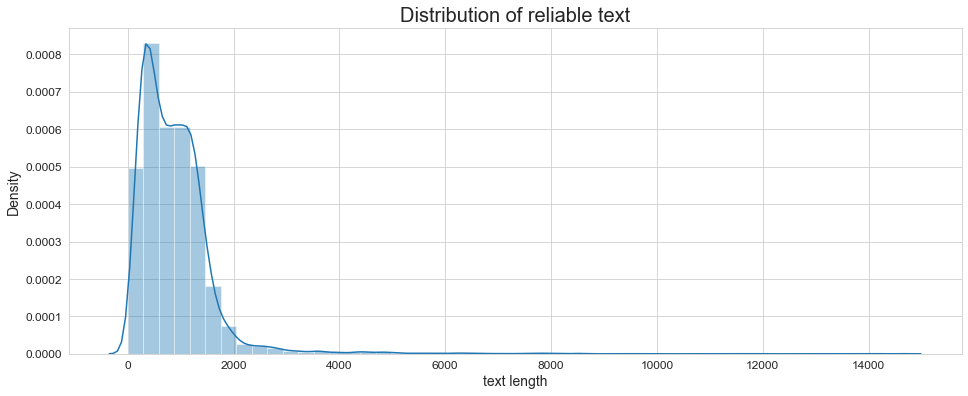

In [151]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(reliable_data['text_length'])  
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12) 
plt.title('Distribution of reliable text', fontsize=20)
plt.xlabel('text length', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

#### Observations
1. Unreliable text data flows gaussian distribution with some skewness
2. Most of the unreliable text have very few lengths, maximum length of the text which belongs to unrelaibe is 25000 words.
3. Most of reliable text length occure in 0 to 2000 words.
4. Maximun length of words for reliable newes is 14000.
5. variance is less for unreliable distribution plot but has right skewness.

### Distribution of Title length

C:\Users\Nimble\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nimble\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

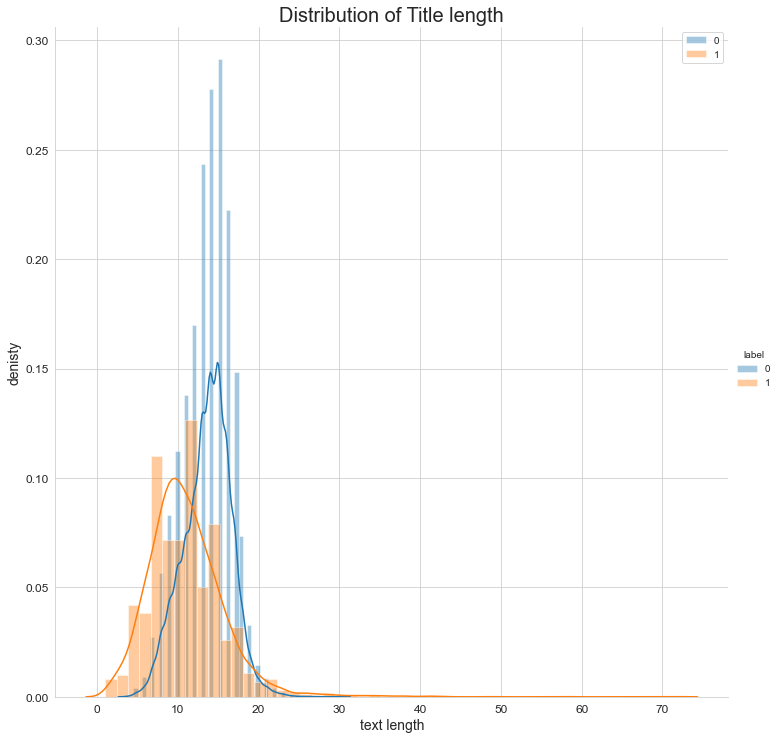

In [152]:
plt.figure(figsize=(10,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.FacetGrid(train_csv, hue="label",height=10) \
   .map(sns.distplot, "title_length").add_legend()# conting unique values  
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12) 
plt.title('Distribution of Title length', fontsize=20)
plt.xlabel('text length', size = 14)
plt.ylabel('denisty', size = 14)
plt.legend()
plt.show()

#### Observations 
1. Reliable news title length distribustion is very similar to gaussian dirtibution.
2. maximun number of title has length between 0 to 70, it  is centerd to aprox to 10 words for unreliable news title.
3. Unreliable title has also follow gaussian distibution with some skewness.
4. Distributions of reliable and unreliable are not overlapping.
5. we can also se for unreliable news there are very less articles which have length between 20 to 70. 


#### Printing 5 random title  and text
##### 1. Text

In [21]:
print(train_csv['text'][0])
print("* * "*30)
print("* * "*30)
print(train_csv['text'][5252])
print("* * "*30)
print("* * "*30)
print(train_csv['text'][1551])
print("* * "*30)
print("* * "*30)
print(train_csv['text'][600])
print("* * "*30)
print("* * "*30)
print(train_csv['text'][20000])
print("* * "*30)
print("* * "*30)

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails 

##### Obsevations
1. There are lots of seplecial sympbol present in the text like Apostrophe('s), Parenthesis(),Single Quotation      Marks(''),Period(.),square brakets[] and many more.
2. Numerical data also present in the text.
3. Username of various social platforms are also present eg. @jasoninthehouse.
4. In text Abrivations are also present eg. Limited English Proficiency (LEP).
5. there are also some words like n*****?, ???? ??

##### 2. Title

In [145]:
print(trian_csv['title'][0])
print("* * "*30)

print(trian_csv['title'][5252])
print("* * "*30)

print(trian_csv['title'][15451])
print("* * "*30)

print(trian_csv['title'][600])
print("* * "*30)

print(trian_csv['title'][20000])
print("* * "*30)


House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Iraqi Offensive South of Mosul Stalls as ISIS Resistance Grows
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
CIA and FBI agents "urgently withdrawn" from Ukraine
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Report: Stopping Only Nine Percent of Illegal Alien Border Crossers Would Pay for Trump’s Border Wall - Breitbart
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Bill Maher Sparks Outrage After Telling Ben Sasse He’s a ’House N**ga’: ’So Hurtful’
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### Preprocessing
    step 1. Decontractions of sentence.
    step 2. Removing URLs from text.
    step 3. Removing username of Twitter i.e (@username).
    step 4. Removing picture links of Twitter.
    step 5. Removing digits from the text.
    step 6. Removing newline chracter and tab (\n,\t)
    step 7. Removing special characters.
    step 8. Removing extra spaces and trailing spaces.
    step 9. Removing stop words.
    step 10.Doing text in lowercase.
    step 11.Removing single words from text.
    
These Preprocessing steps will apply on Text, title and author name.    

In [41]:
# https://gist.github.com/sebleier/554280
# refrence applied ai
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [42]:
import re
from bs4 import BeautifulSoup
def preprocessig_text(text):
    #remove HTML from the Text column and save in the Text if present
    string=str(text)
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()    
    ################################################
    # decontracting text refrence applied ai
    string = re.sub(r"won't", "will not", string)
    string = re.sub(r"can\'t", "can not", string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    ###################################################
    # removing url from text
    #http://urlregex.com/
    string=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', string)
    string=re.sub('(@\w{1,})','',string) # removing usernames(@johndeapth)
    string=re.sub('pic.twitter.com/.+','',string) # removing image captions
    string=re.sub('\d','',string) # removing digits
    string=re.sub('\n',' ', string) # repacing new line character with one space
    string=re.sub('\t',' ', string) # replacing tab with space
    ##################################################################################################
    # removing some of the spacial charcters.
    string=re.sub('\.','',string) # removing period
    string=re.sub(',','', string) # removing comma
    string=re.sub('_','', string) # removing underscore
    string=re.sub('-',' ', string) # remving hyphen
    string=re.sub('[^A-aZ-z ]','', string) # removing all special charcters  expect space  and 
    #if diffent language wordcome it will also take care of it.
    string=re.sub('\[',' ', string) # removing square brackets
    string=re.sub('\]',' ', string) # 
    string=re.sub(' {2,}',' ', string) # replacing two or more spaces with one space
    string=string.strip()
    # removing stop words from text
    # https://gist.github.com/sebleier/554280
    string = ' '.join(e for e in string.split() if e.lower() not in stopwords)
    string=string.lower()
    string = re.sub(r'\b\w{1,2}\b',"",string) #remove words <2
    string=re.sub(' {2,}','', string) # replacing two or more spaces with one space
    return string   

In [43]:
#printing preprocessed text.
print(preprocessig_text(train_csv.text[20000]))

bill maher calling housefridays episode real time sparked serious outrage across social media caused many people including prominent black social justice activists call hbo host fired conversation sen ben sasse maher told lawmaker ive gotta get nebraska youre welcome wed love work fieldssen sasse jokingly replied maher said response work fields senatorhousemet mix groans laughs audience maher said joke internet however didnt find mahers comments funny explanation acceptable black lives matter activist deray mckesson wrote twitter really gotexplanations make acceptable really gotexplanations make acceptable pic twitter deray mckesson june audience think okay laugh ben sasse doesnt even flinch happening world mckesson added audience think okay laugh ben sasse doesnt even flinch happening world deray mckesson june netflixs orange new black star danielle brooks shared mckessons furor maher said writing twitter unacceptable audience applauds hurtful unacceptable audience applauds hurtful ht

In [44]:
#Creating new columns for preprocessed text, title and author name.
from tqdm import tqdm
def get_preprocess(column):
    pre_pro_text=[]
    for i in tqdm(column):
        pre_text=''
        pre_text=preprocessig_text(i)
        pre_pro_text.append(pre_text)
    return pre_pro_text


In [45]:
# train data.
#getting preprocessed text.
pre_text=get_preprocess(train_csv.text.values)
pre_title=get_preprocess(train_csv.title.values)
pre_author=get_preprocess(train_csv.author.values)
# test data
pre_text_test=get_preprocess(test_csv.text.values)
pre_title_test=get_preprocess(test_csv.title.values)
pre_author_test=get_preprocess(test_csv.author.values)

 95%|██████████████████████████████████████████████████████████████████████▏   | 17289/18240 [00:09<00:00, 1899.58it/s]C:\Users\Nimble\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "https://youtu.be/BFpFCy_b2SM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 4573/4573 [00:02<00:00, 2179.25it/s]


In [46]:
#adding preoprocseed data into dataframe
train_csv['pre_text']=pre_text
train_csv['pre_title']=pre_title
train_csv['pre_author']=pre_author
# test data
test_csv['pre_text']=pre_text_test
test_csv['pre_title']=pre_title_test
test_csv['pre_author']=pre_author_test

In [47]:
train_csv.tail(10)

,id,title,author,text,label,pre_text,pre_title,pre_author
20790,20790,Nikki Haley Blasts U.N. Human Rights Office fo...,Adam Shaw,U. S Ambassador to the United Nations Nikki Ha...,0,ambassador united nations nikki haley blasted...,nikki haley blastshuman rights office unfair b...,adam shaw
20791,20791,Lawyer Who Kept Hillary Campaign Chief Out of ...,Daniel Greenfield,Lawyer Who Kept Hillary Campaign Chief Out of ...,1,lawyer kept hillary campaign chief jail doj hi...,lawyer kept hillary campaign chief jail doj hi...,daniel greenfield
20792,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0,two suicide bombers attacked bus station jakar...,jakarta bombing kills three police officers li...,john hayward
20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1,share although vandal thought cool destroy don...,idiot destroyed trump hollywood star gets exac...,robert rich
20794,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0,donald trump took twitter friday praise vladim...,trump putin smart not retaliate obama sanction...,lee stranahan
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper unloaded black celebrities met donald t...,rappertrump poster child white supremacy,jerome hudson
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,green bay packers lost washington redskins wee...,nfl playoffs schedule matchups odds new york t...,benjamin hoffman
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,macys today grew union several great names ame...,macys said receive takeover approach hudsons b...,michaelmerced rachel abrams
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercises balkans pr...,nato russia hold parallel exercises balkans,alex ansary
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,david swanson author activist journalist radio...,keepsalive,david swanson


In [38]:
train_csv.shape

(18240, 8)